In [1]:
from sklearn import preprocessing
from IPython.core.interactiveshell import InteractiveShell
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
# from collections import defaultdicta
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
# READ DATA

bike = pd.read_csv("day.csv", parse_dates=['dteday'])

## DATA UNDERSTANDING

In [3]:
# Check the head of the dataset
print(bike.head)

<bound method NDFrame.head of      instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1 2018-01-01       1   0     1        0        6           0   
1          2 2018-02-01       1   0     1        0        0           0   
2          3 2018-03-01       1   0     1        0        1           1   
3          4 2018-04-01       1   0     1        0        2           1   
4          5 2018-05-01       1   0     1        0        3           1   
..       ...        ...     ...  ..   ...      ...      ...         ...   
725      726 2019-12-27       1   1    12        0        4           1   
726      727 2019-12-28       1   1    12        0        5           1   
727      728 2019-12-29       1   1    12        0        6           0   
728      729 2019-12-30       1   1    12        0        0           0   
729      730 2019-12-31       1   1    12        0        1           1   

     weathersit       temp     atemp      hum  windspeed  casual  reg

In [4]:
# Chcek the descriptive information

print(bike.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [5]:
#Check the descriptive  statistics

print(bike.describe())

          instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.5448

In [6]:
# Check the shape of df

print(bike.shape)

(730, 16)


## Check for NULL/MISSING values

In [7]:
# percentage of missing values in each column
round(100*(bike.isnull().sum()/len(bike.index)), 2).sort_values(ascending=False)

cnt           0.0
registered    0.0
casual        0.0
windspeed     0.0
hum           0.0
atemp         0.0
temp          0.0
weathersit    0.0
workingday    0.0
weekday       0.0
holiday       0.0
mnth          0.0
yr            0.0
season        0.0
dteday        0.0
instant       0.0
dtype: float64

In [8]:
# row-wise null count percentage
round((bike.isnull().sum(axis=1)/122)*100,2).sort_values(ascending=False)

729    0.0
250    0.0
248    0.0
247    0.0
246    0.0
      ... 
484    0.0
483    0.0
482    0.0
481    0.0
0      0.0
Length: 730, dtype: float64

In [10]:
# Duplicate Check

# Create a dummy dataframe (copy of original bike df) for duplicate check
bike_dup = bike

# Checking for duplicates and dropping the entire duplicate row if any
bike_dup.drop_duplicates(subset=None, inplace=True)

In [11]:
bike_dup.shape


(730, 16)

## Data Cleaning

In [12]:
#Create a copy of ca dataframe, without the 'instant' column, 
#as this will have unique values, and donot make sense to do a value count on it.

bike_dummy=bike.iloc[:,1:16]


for col in bike_dummy:
    print(bike_dummy[col].value_counts(), '\n')

2019-10-25    1
2019-12-22    1
2019-03-08    1
2018-01-15    1
2018-03-18    1
             ..
2018-08-04    1
2018-10-05    1
2019-11-11    1
2019-02-12    1
2018-12-21    1
Name: dteday, Length: 730, dtype: int64 

3    188
2    184
1    180
4    178
Name: season, dtype: int64 

1    365
0    365
Name: yr, dtype: int64 

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64 

0    709
1     21
Name: holiday, dtype: int64 

6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64 

1    499
0    231
Name: workingday, dtype: int64 

1    463
2    246
3     21
Name: weathersit, dtype: int64 

10.899153    5
26.035000    5
23.130847    4
28.563347    4
27.880000    4
            ..
27.025847    1
19.270000    1
13.191299    1
24.155847    1
5.526103     1
Name: temp, Length: 498, dtype: int64 

32.73440    4
18.78105    3
31.85040    3
16.28750    2
17.58145    2
           .

In [13]:
bike.columns


Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [15]:
#dropping columns that are not nessacry
bike_new=bike[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

bike_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 74.1 KB


## Creating Dummy Variables


We will create DUMMY variables for 4 categorical variables 'mnth', 'weekday', 'season' & 'weathersit'. - Before creating dummy variables, we will have to convert them into 'category' data types. 


In [16]:
# Check the datatypes before convertion
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 74.1 KB


In [17]:
# Convert to 'category' data type

bike_new['season']=bike_new['season'].astype('category')
bike_new['weathersit']=bike_new['weathersit'].astype('category')
bike_new['mnth']=bike_new['mnth'].astype('category')
bike_new['weekday']=bike_new['weekday'].astype('category')
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 55.2 KB


<ipython-input-17-231bc97256f0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_new['season']=bike_new['season'].astype('category')
<ipython-input-17-231bc97256f0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_new['weathersit']=bike_new['weathersit'].astype('category')
<ipython-input-17-231bc97256f0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [18]:
# we are doing the following three things:
# 1) Create Dummy variable
# 2) Drop original variable for which the dummy was created
# 3) Drop first dummy variable for each set of dummies created.

bike_new = pd.get_dummies(bike_new, drop_first=True)


# We will visualise the changes after the dummy creation.

bike_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [19]:
bike_new.shape


(730, 30)

In [20]:
# Creating a new df for just showcasing the feature engineering capability
bike_fe=bike

### Week number


In [21]:
#We will extract the week number (1-52) from the date (dteday) column provided
bike_fe['weekno']=bike_fe['dteday'].dt.week


### Quarter

In [22]:
#We will calculate the Quarter from the month (mnth) column provided
bike_fe['qtr']=bike_fe['mnth']//4+1

### Registered to Casual user ratio


In [24]:
#We will calculate the registered to casual user ratio from the columns (registered & casual) provided
bike_fe['rc_ratio']=round((bike['registered']/bike_fe['casual']),1)

### Feeling to Actual temperature ratio

In [25]:
#We will calculate the Feeling (atemp) to actual (temp) temperature ratio from the columns provided
bike_fe['temp_ratio']=round(bike_fe['atemp']/bike_fe['temp'],1)

### Weather Comfort Index:

1. An arbitrary index of the suitability of environmental conditions to physical activity.

2. It is calculated using the formula --> Comfort Index = (temperature + relative humidity)/4.

In [26]:
bike_fe['wci']=(bike_fe['atemp']+bike_fe['hum'])/4

In [27]:
bike_fe.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,hum,windspeed,casual,registered,cnt,weekno,qtr,rc_ratio,temp_ratio,wci
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,...,80.5833,10.749882,331,654,985,1,1,2.0,1.3,24.691137
1,2,2018-02-01,1,0,1,0,0,0,2,14.902598,...,69.6087,16.652113,131,670,801,5,1,5.1,1.2,21.823912
2,3,2018-03-01,1,0,1,0,1,1,1,8.050924,...,43.7273,16.636703,120,1229,1349,9,1,10.2,1.2,13.299387
3,4,2018-04-01,1,0,1,0,2,1,1,8.200000,...,59.0435,10.739832,108,1454,1562,13,1,13.5,1.3,17.412400
4,5,2018-05-01,1,0,1,0,3,1,1,9.305237,...,43.6957,12.522300,82,1518,1600,18,1,18.5,1.2,13.789800


## SPLITTING THE DATA

In [28]:
# Check the shape before spliting

bike_new.shape

(730, 30)

In [29]:
# Check the info before spliting

bike_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [30]:
from sklearn.model_selection import train_test_split

# We specify 'random_state' so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(bike_new, train_size = 0.70, test_size = 0.30, random_state = 333)

In [31]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 non-null  

In [32]:
df_train.shape

(510, 30)

In [33]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   cnt           219 non-null    int64  
 8   season_2      219 non-null    uint8  
 9   season_3      219 non-null    uint8  
 10  season_4      219 non-null    uint8  
 11  mnth_2        219 non-null    uint8  
 12  mnth_3        219 non-null    uint8  
 13  mnth_4        219 non-null    uint8  
 14  mnth_5        219 non-null    uint8  
 15  mnth_6        219 non-null    uint8  
 16  mnth_7        219 non-null    uint8  
 17  mnth_8        219 non-null    uint8  
 18  mnth_9        219 non-null   

In [34]:
df_test.shape

(219, 30)

## EXPLORATORY DATA ANALYSIS (EDA)

## Visualising Numeric Variables

Let's make a pairplot of all the numeric variables.

In [35]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 non-null  

In [36]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

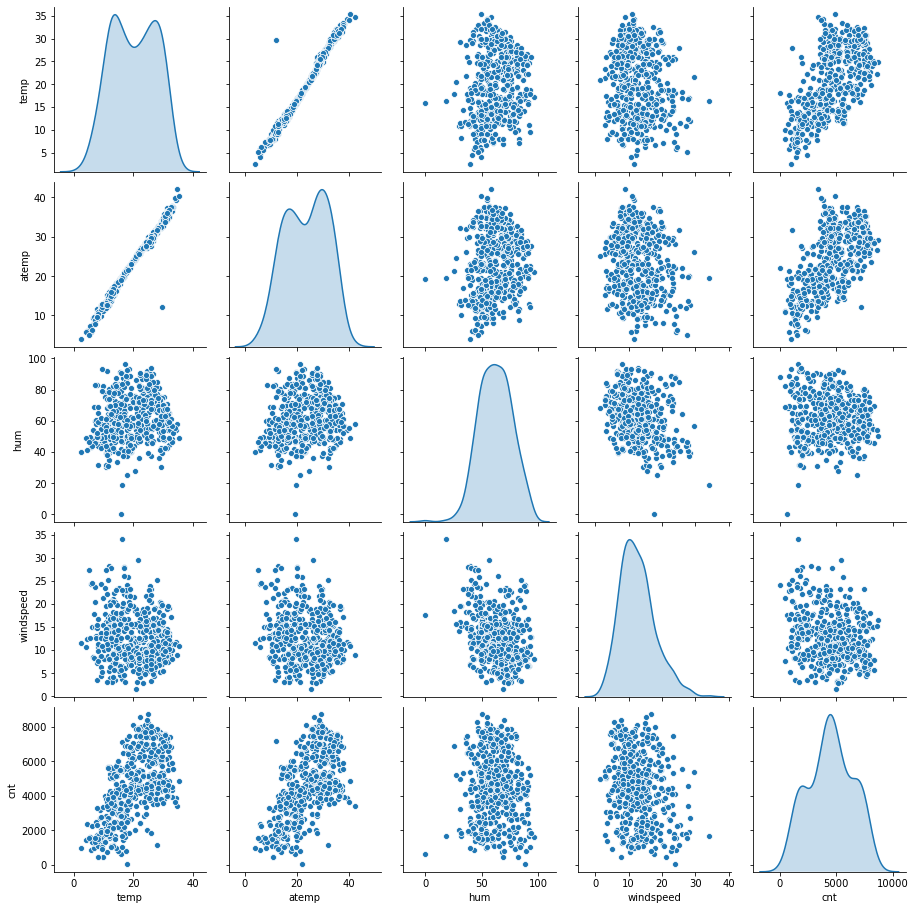

In [37]:
# Create a new dataframe of only numeric variables:

bike_num=df_train[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

## Visualising Catagorical Variables

In [38]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 non-null  

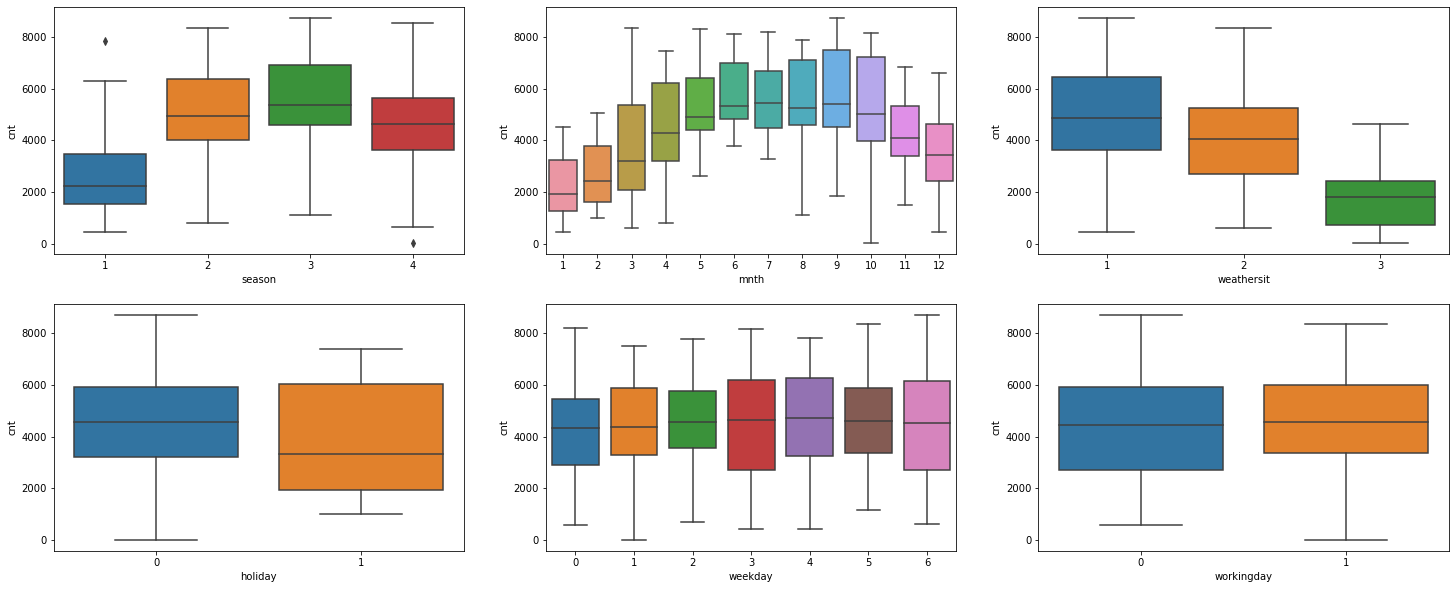

In [39]:
# Build boxplot of all categorical variables (before creating dummies) againt the target variable 'cnt' 
# to see how each of the predictor variable stackup against the target variable.

plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()

## Correlation Matrix

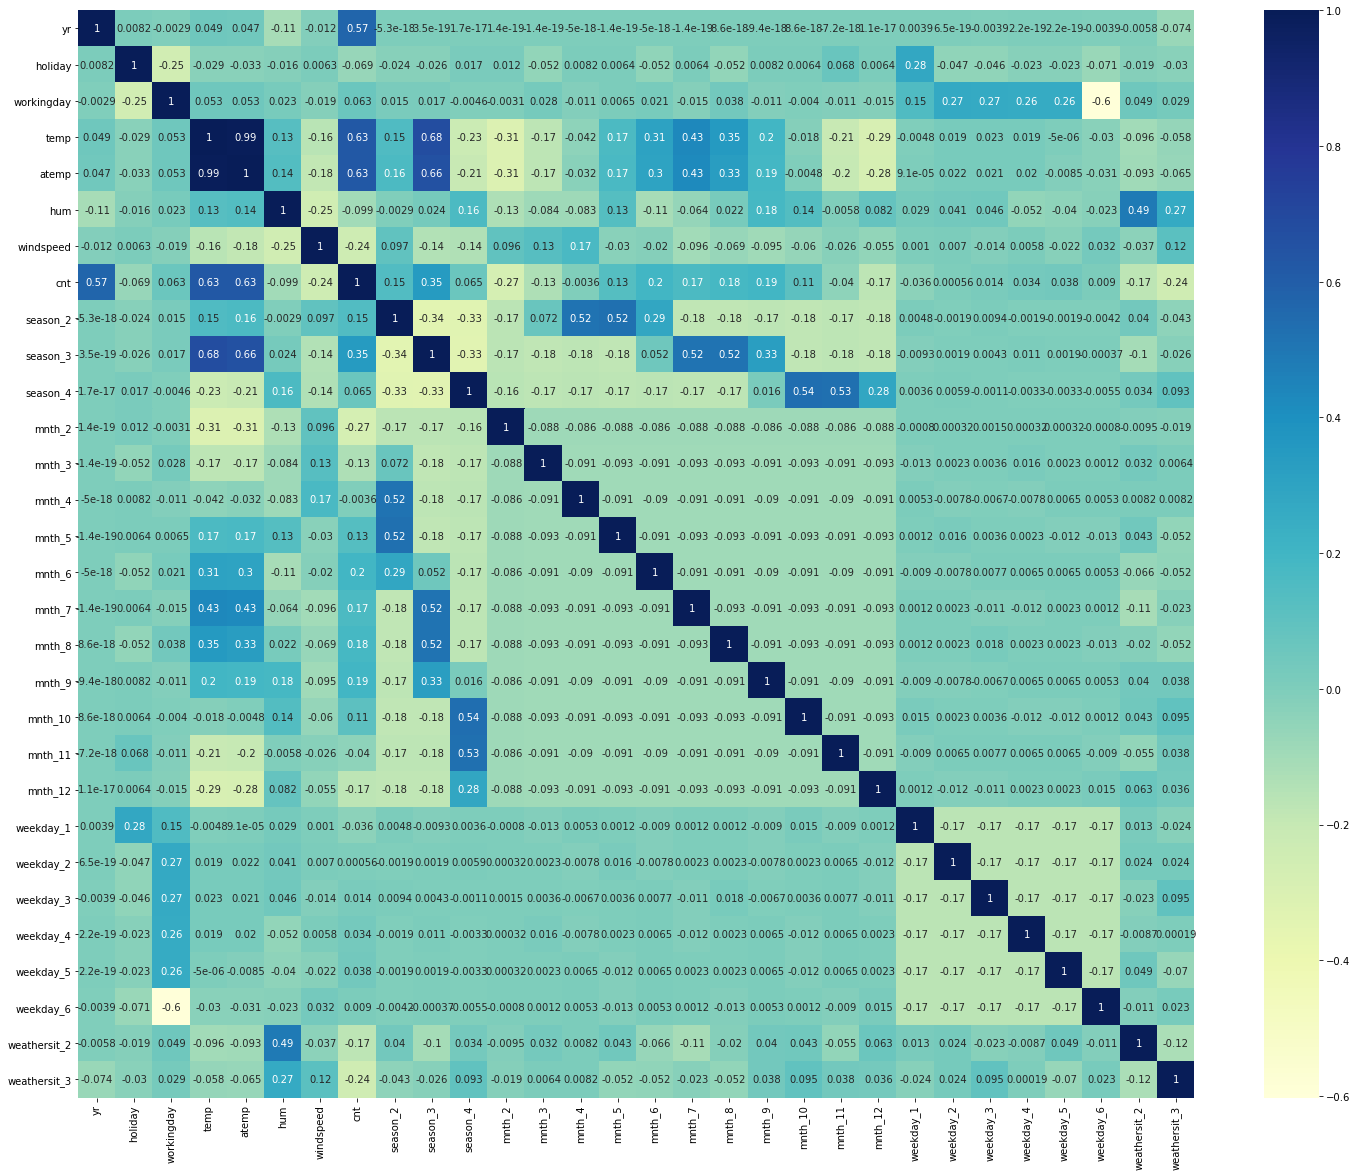

In [41]:
 #Let's check the correlation coefficients to see which variables are highly correlated. Note:
# here im considering only those variables (dataframe: bike_new) that were chosen for analysis

plt.figure(figsize = (25,20))
sns.heatmap(bike_new.corr(), annot = True, cmap="YlGnBu")
plt.show()

## RESCALING THE FEATURES

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
scaler = MinMaxScaler()

In [44]:
# Checking the values before scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
483,1,0,0,18.791653,22.50605,58.7083,7.832836,6304,1,0,...,0,0,0,0,0,0,0,0,0,0
650,1,0,0,16.126653,19.56980,49.4583,9.791514,7109,0,0,...,0,0,0,0,0,0,0,1,0,0
212,0,0,1,31.638347,35.16460,55.0833,10.500039,4266,0,1,...,0,0,1,0,0,0,0,0,0,0
714,1,0,0,14.862500,18.49690,83.8750,6.749714,3786,0,0,...,0,1,0,0,0,0,0,0,1,0
8,0,0,0,5.671653,5.80875,43.4167,24.250650,822,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [46]:
# Apply scaler() to all the numeric variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

<ipython-input-46-439aba1c88c9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
C:\Users\jaith\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [47]:
# Checking values after scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
483,1,0,0,0.497426,0.487055,0.609956,0.194850,0.722734,1,0,...,0,0,0,0,0,0,0,0,0,0
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,...,0,0,0,0,0,0,0,1,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,0,1,...,0,0,1,0,0,0,0,0,0,0
714,1,0,0,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,...,0,1,0,0,0,0,0,0,1,0
8,0,0,0,0.098690,0.048706,0.451083,0.700017,0.092039,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.682353,0.540901,0.515631,0.647390,0.346318,0.515144,0.247059,0.262745,...,0.086275,0.076471,0.139216,0.141176,0.150980,0.129412,0.145098,0.150980,0.341176,0.025490
std,0.500487,0.151726,0.466018,0.227898,0.213626,0.149722,0.160266,0.224281,0.431725,0.440557,...,0.281045,0.266010,0.346511,0.348545,0.358381,0.335985,0.352545,0.358381,0.474570,0.157763
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343228,0.335807,0.536147,0.230784,0.359468,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.525578,0.646367,0.325635,0.516337,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.740406,0.692378,0.757900,0.434287,0.685861,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## BUILDING A LINEAR MODEL
### Dividing into X and Y sets for the model building

In [49]:
y_train = df_train.pop('cnt')
X_train = df_train

## Recursive feature elimination (RFE)

We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [50]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [51]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

C:\Users\jaith\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [52]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 14),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 7),
 ('mnth_3', True, 1),
 ('mnth_4', False, 3),
 ('mnth_5', False, 2),
 ('mnth_6', False, 4),
 ('mnth_7', False, 15),
 ('mnth_8', False, 5),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 8),
 ('mnth_12', False, 9),
 ('weekday_1', False, 6),
 ('weekday_2', False, 13),
 ('weekday_3', False, 11),
 ('weekday_4', False, 12),
 ('weekday_5', False, 10),
 ('weekday_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [53]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_3', 'mnth_9', 'mnth_10', 'weekday_6',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [54]:
X_train.columns[~rfe.support_]

Index(['holiday', 'mnth_2', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5'],
      dtype='object')

In [55]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

## Building Linear Model using 'STATS MODEL'

### Model 1
### VIF Check

In [56]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,384.22
3,atemp,363.12
4,hum,17.52
7,season_3,7.09
5,windspeed,4.71
1,workingday,4.61
6,season_2,3.54
8,season_4,3.01
13,weathersit_2,2.14
0,yr,2.02


In [57]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [58]:
# Check the parameters obtained

lr1.params

const           0.195340
yr              0.228741
workingday      0.040787
temp            0.433878
atemp           0.058635
hum            -0.178382
windspeed      -0.184925
season_2        0.130228
season_3        0.079599
season_4        0.153475
mnth_3          0.047149
mnth_9          0.100017
mnth_10         0.054370
weekday_6       0.054618
weathersit_2   -0.047472
weathersit_3   -0.271174
dtype: float64

In [59]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.1
Date:                Tue, 22 Sep 2020   Prob (F-statistic):          1.28e-186
Time:                        13:09:30   Log-Likelihood:                 509.26
No. Observations:                 510   AIC:                            -986.5
Df Residuals:                     494   BIC:                            -918.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1953      0.030      6.576   

### Model 2

In [60]:
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

In [61]:
#VIF Check
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,23.21
3,hum,17.23
6,season_3,7.01
1,workingday,4.60
4,windspeed,4.55
5,season_2,3.54
7,season_4,3.01
12,weathersit_2,2.14
0,yr,2.02
11,weekday_6,1.79


In [62]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [63]:
# Check the parameters obtained

lr2.params

const           0.196221
yr              0.228723
workingday      0.040773
temp            0.489280
hum            -0.177805
windspeed      -0.187198
season_2        0.130352
season_3        0.078664
season_4        0.153732
mnth_3          0.047295
mnth_9          0.100029
mnth_10         0.054438
weekday_6       0.054705
weathersit_2   -0.047620
weathersit_3   -0.271535
dtype: float64

In [64]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.9
Date:                Tue, 22 Sep 2020   Prob (F-statistic):          1.00e-187
Time:                        13:10:33   Log-Likelihood:                 509.17
No. Observations:                 510   AIC:                            -988.3
Df Residuals:                     495   BIC:                            -924.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1962      0.030      6.627   

### Model 3

In [65]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [66]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,16.81
5,season_3,6.75
3,windspeed,4.27
1,workingday,4.11
4,season_2,3.51
6,season_4,2.89
0,yr,2.02
9,mnth_10,1.66
10,weekday_6,1.66
11,weathersit_2,1.54


In [67]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [68]:
# Check the parameters obtained

lr3.params

const           0.091594
yr              0.233129
workingday      0.042443
temp            0.456709
windspeed      -0.148815
season_2        0.131914
season_3        0.087922
season_4        0.150243
mnth_3          0.055303
mnth_9          0.091371
mnth_10         0.053320
weekday_6       0.055451
weathersit_2   -0.077149
weathersit_3   -0.324223
dtype: float64

In [69]:
# Check the parameters obtained

lr3.params

const           0.091594
yr              0.233129
workingday      0.042443
temp            0.456709
windspeed      -0.148815
season_2        0.131914
season_3        0.087922
season_4        0.150243
mnth_3          0.055303
mnth_9          0.091371
mnth_10         0.053320
weekday_6       0.055451
weathersit_2   -0.077149
weathersit_3   -0.324223
dtype: float64

In [70]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     192.2
Date:                Tue, 22 Sep 2020   Prob (F-statistic):          4.52e-184
Time:                        13:13:50   Log-Likelihood:                 497.71
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     496   BIC:                            -908.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0916      0.020      4.509   

### Model 4

In [71]:
X_train_new = X_train_new.drop(["season_3"], axis = 1)

In [72]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.92
3,windspeed,4.15
1,workingday,4.07
0,yr,2.01
5,season_4,1.98
9,weekday_6,1.66
8,mnth_10,1.63
4,season_2,1.56
10,weathersit_2,1.54
7,mnth_9,1.23


In [73]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [74]:
# Check the parameters obtained

lr4.params

const           0.076726
yr              0.231340
workingday      0.042231
temp            0.568327
windspeed      -0.153306
season_2        0.083704
season_4        0.119733
mnth_3          0.044132
mnth_9          0.102838
mnth_10         0.041927
weekday_6       0.056942
weathersit_2   -0.077340
weathersit_3   -0.316638
dtype: float64

In [75]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     200.2
Date:                Tue, 22 Sep 2020   Prob (F-statistic):          1.56e-181
Time:                        13:14:59   Log-Likelihood:                 488.92
No. Observations:                 510   AIC:                            -951.8
Df Residuals:                     497   BIC:                            -896.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0767      0.020      3.775   

### Model 5

In [76]:
X_train_new = X_train_new.drop(["mnth_10"], axis = 1)

In [77]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.80
3,windspeed,4.11
1,workingday,4.07
0,yr,2.00
8,weekday_6,1.66
4,season_2,1.56
9,weathersit_2,1.53
5,season_4,1.41
7,mnth_9,1.20
6,mnth_3,1.15


In [78]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [79]:
# Check the parameters obtained

lr5.params

const           0.074194
yr              0.230191
workingday      0.042294
temp            0.575607
windspeed      -0.156154
season_2        0.082553
season_4        0.134820
mnth_3          0.044834
mnth_9          0.096439
weekday_6       0.057422
weathersit_2   -0.075711
weathersit_3   -0.311216
dtype: float64

In [80]:
# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     216.0
Date:                Tue, 22 Sep 2020   Prob (F-statistic):          1.39e-181
Time:                        13:15:50   Log-Likelihood:                 486.24
No. Observations:                 510   AIC:                            -948.5
Df Residuals:                     498   BIC:                            -897.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0742      0.020      3.640   

### Model 6

In [81]:
X_train_new = X_train_new.drop(["mnth_3"], axis = 1)

In [82]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.72
3,windspeed,4.02
1,workingday,4.01
0,yr,2.00
7,weekday_6,1.65
4,season_2,1.56
8,weathersit_2,1.52
5,season_4,1.38
6,mnth_9,1.20
9,weathersit_3,1.07


In [83]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

In [84]:
# Check the parameters obtained

lr6.params

const           0.084143
yr              0.230846
workingday      0.043203
temp            0.563615
windspeed      -0.155191
season_2        0.082706
season_4        0.128744
mnth_9          0.094743
weekday_6       0.056909
weathersit_2   -0.074807
weathersit_3   -0.306992
dtype: float64

In [85]:
# Print a summary of the linear regression model obtained
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     233.8
Date:                Tue, 22 Sep 2020   Prob (F-statistic):          3.77e-181
Time:                        13:17:12   Log-Likelihood:                 482.39
No. Observations:                 510   AIC:                            -942.8
Df Residuals:                     499   BIC:                            -896.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0841      0.020      4.168   

## Final Model Interpretation

### Hypothesis Testing:

#### Hypothesis testing states that:
 H0:B1=B2=...=Bn=0 
 H1:  at least one  Bi!=0 



#### lr6 model coefficient values

1.const 0.084143
2.yr 0.230846
3.workingday 0.043203
4.temp 0.563615
5.windspeed -0.155191
6.season_2 0.082706
7.season_4 0.128744
8.nth_9 0.094743
9.weekday_6 0.056909
10.weathersit_2 -0.074807
11.weathersit_3 -0.306992



### F Statistics


F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.
 F-statistic: 233.8
 Prob (F-statistic): 3.77e-181


##### The F-Statistics value of 233 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant

#### The equation of best fitted surface based on model lr6:

cnt=0.084143+(yr×0.230846)+(workingday×0.043203)+(temp×0.563615)−(windspeed×0.155191)+(season2×0.082706)+(season4×0.128744)+(mnth9×0.094743)+(weekday6×0.056909)−(weathersit2×0.074807)−(weathersit3×0.306992)

### Interpretation of Coefficients:

temp: A coefficient value of ‘0.5636’ indicated that a unit increase in temp variable, increases the bike hire numbers by 0.5636 units.

weathersit_3: A coefficient value of ‘-0.3070’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit3 variable, decreases the bike hire numbers by 0.3070 units.

yr: A coefficient value of ‘0.2308’ indicated that a unit increase in yr variable, increases the bike hire numbers by 0.2308 units.

season_4: A coefficient value of ‘0.128744’ indicated that w.r.t season_1, a unit increase in season_4 variable increases the bike hire numbers by 0.128744 units.

windspeed: A coefficient value of ‘-0.155191’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.155191 units.

workingday: A coefficient value of ‘0.043203’ indicated that, a unit increase in workingday variable increases the bike hire numbers by 0.043203 units.

season_2: A coefficient value of ‘0.082706’ indicated that w.r.t season_1, a unit increase in season_2 variable decreases the bike hire numbers by 0.082706 units.

mnth_9: A coefficient value of ‘0.094743’ indicated that w.r.t mnth_1, a unit increase in mnth_9 variable increases the bike hire numbers by 0.094743 units.

weekday_6: A coefficient value of ‘0.056909’ indicated that w.r.t weekday_1, a unit increase in weekday_6 variable increases the bike hire numbers by 0.056909 units.

weathersit_2: A coefficient value of ‘-0.074807’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit2 variable, decreases the bike hire numbers by 0.074807 units.

const: The Constant value of ‘0.084143’ indicated that, in the absence of all other predictor variables (i.e. when x1,x2...xn =0), The bike rental can still increase by 0.084143 units.

## VALIDATE ASSUMPTIONS

### Error terms are normally distributed with mean zero (not X, Y)

  ##### Residual Analysis Of Training Data

In [86]:
y_train_pred = lr6.predict(X_train_lm6)

Text(0.5, 0, 'Errors')

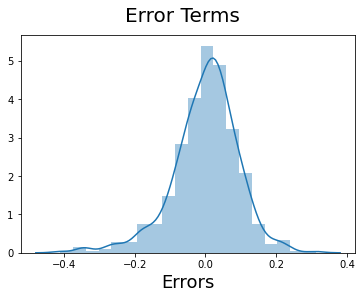

In [87]:
res = y_train-y_train_pred

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### There is a linear relationship between X and Y

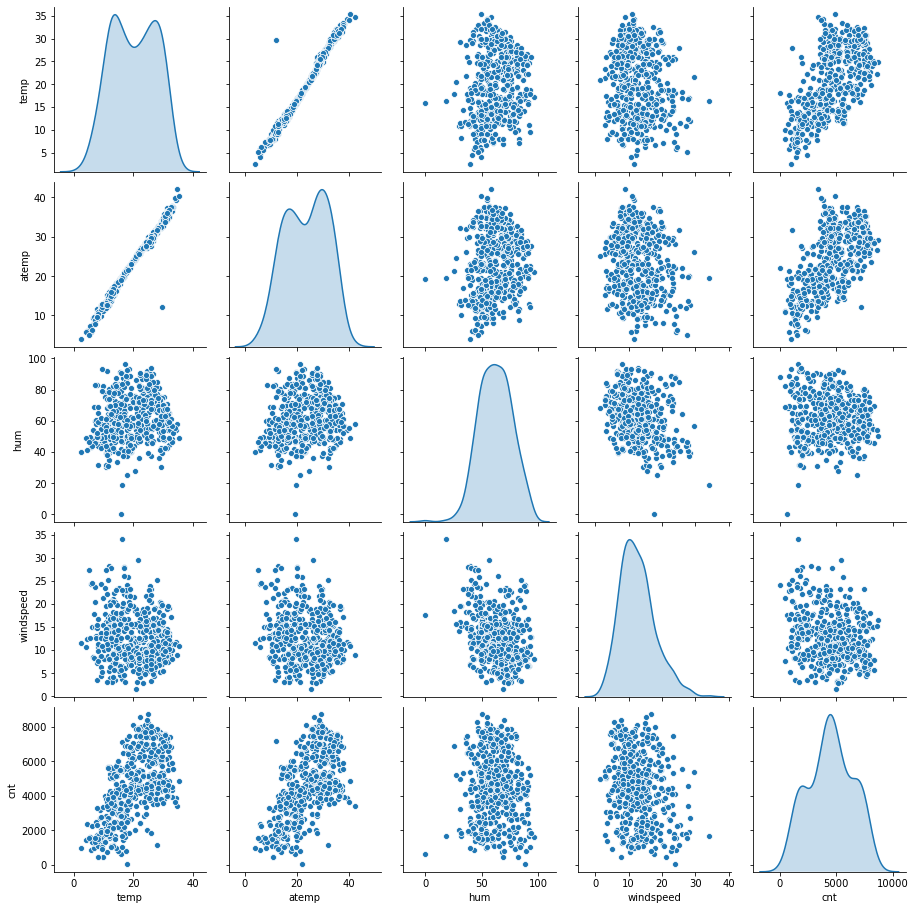

In [88]:
bike_new=bike_new[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

### There is No Multicollinearity between the predictor variables

In [91]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

## MAKING PREDICTION USING FINAL MODEL

### Now that we have fitted the model and checked the assumptions, it's time to go ahead and make predictions using the final model (lr6)

##### Applying the scaling on the test sets

In [92]:
# Apply scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform, 
# as we want to use the metrics that the model learned from the training data to be applied on the test data. 
# In other words, we want to prevent the information leak from train to test dataset.

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [93]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
22,0,0,0,0.046591,0.025950,0.453529,0.462217,0.110907,0,0,...,0,0,0,0,0,0,0,0,0,0
468,1,0,0,0.543115,0.536771,0.522511,0.347424,0.855729,1,0,...,0,0,0,0,0,0,0,1,0,0
553,1,0,0,0.951196,0.933712,0.596104,0.212829,0.534975,0,1,...,0,0,0,0,0,0,0,0,0,0
504,1,0,0,0.699909,0.662746,0.551083,0.478229,0.817648,1,0,...,0,0,0,0,0,0,0,0,0,0
353,0,0,1,0.407087,0.416610,0.618615,0.080770,0.428900,0,0,...,0,1,0,1,0,0,0,0,1,0


In [94]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.493151,0.041096,0.684932,0.551225,0.527528,0.662567,0.346706,0.518889,0.264840,0.246575,...,0.073059,0.105023,0.155251,0.146119,0.118721,0.173516,0.132420,0.127854,0.324201,0.036530
std,0.501098,0.198967,0.465607,0.229463,0.215434,0.143562,0.159553,0.219953,0.442259,0.432005,...,0.260830,0.307285,0.362974,0.354034,0.324202,0.379560,0.339723,0.334692,0.469148,0.188034
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.301299,0.073090,0.055683,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.356479,0.348019,0.553031,0.232689,0.364703,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.557653,0.549198,0.662338,0.328208,0.525771,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.751309,0.709163,0.762338,0.435708,0.676887,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.010390,0.824380,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X_test and y_test

In [95]:
y_test = df_test.pop('cnt')
X_test = df_test

X_test.info()



# y_test = df_test.pop('cnt')
# X_test = df_test

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   season_2      219 non-null    uint8  
 8   season_3      219 non-null    uint8  
 9   season_4      219 non-null    uint8  
 10  mnth_2        219 non-null    uint8  
 11  mnth_3        219 non-null    uint8  
 12  mnth_4        219 non-null    uint8  
 13  mnth_5        219 non-null    uint8  
 14  mnth_6        219 non-null    uint8  
 15  mnth_7        219 non-null    uint8  
 16  mnth_8        219 non-null    uint8  
 17  mnth_9        219 non-null    uint8  
 18  mnth_10       219 non-null   

In [96]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns

X_test=X_test[col1]

# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)

X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   windspeed     219 non-null    float64
 5   season_2      219 non-null    uint8  
 6   season_4      219 non-null    uint8  
 7   mnth_9        219 non-null    uint8  
 8   weekday_6     219 non-null    uint8  
 9   weathersit_2  219 non-null    uint8  
 10  weathersit_3  219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 11.5 KB


In [97]:
# Making predictions using the final model (lr6)

y_pred = lr6.predict(X_test_lm6)

### MODEL EVALUATION

Text(0, 0.5, 'y_pred')

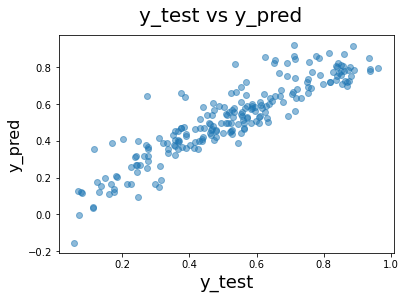

In [98]:
# Plotting y_test and y_pred to understand the spread
# import matplotlib.pyplot as plt
# import numpy as np


fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

## R^2 Value for TEST

In [99]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8203092200749708

### Adjusted R^2 Value for TEST

Formula for Adjusted R^2

R^2adj.=1−(1−R2)∗(n−1/n−p−1)

In [100]:
# We already have the value of R^2 (calculated in above step)

r2=0.8203092200749708

In [101]:
# Get the shape of X_test

X_test.shape

(219, 10)

In [102]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.8116702402708829